# Analysis of the California Housing Prices dataset
This notebook contains an analysis of the California Housing Prices dataset, described e.g. at https://www.kaggle.com/camnugent/california-housing-prices. 
The dataset contains 9 features, which can be used to predict the median house value.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets.california_housing import fetch_california_housing
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

/anaconda3/envs/neue-fische/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("../data/housing.csv", sep=";")

## 1) Basic preprocessing

### Encoding categorical features: transforming ocean proximity to a one hot encoded feature

In [3]:
enc_labels = preprocessing.LabelEncoder()
enc_labels.fit(data["ocean_proximity"])
new_ocean_prox = enc_labels.transform(data["ocean_proximity"]) # new_ocean_prox = np.ndarray
enc_ohe = preprocessing.OneHotEncoder(sparse=False) # easier to read
new_ocean_arr = enc_ohe.fit_transform(new_ocean_prox.reshape(-1, 1))
new_ocean_df = pd.DataFrame(data = new_ocean_arr, columns = list(enc_labels.classes_))
data_new = pd.concat([data,new_ocean_df],axis=1)
data_new.drop("ocean_proximity",axis = 1,inplace = True)
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0


### Replacing NaNs

In [4]:
print(data_new.isnull().sum().sum()) # nr of nans
print(data_new.isna().any()) # cols with nans

207
longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
<1H OCEAN             False
INLAND                False
ISLAND                False
NEAR BAY              False
NEAR OCEAN            False
dtype: bool


In [5]:
# replacing the 207 NaNs in column total_bedrooms by mean of the column
data_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.000000,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.000000,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.000000,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.000000,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.000000,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52,919,213.000000,413,193,4.0368,269700,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52,2535,489.000000,1094,514,3.6591,299200,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52,3104,687.000000,1157,647,3.1200,241400,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42,2555,665.000000,1206,595,2.0804,226700,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52,3549,707.000000,1551,714,3.6912,261100,0.0,0.0,0.0,1.0,0.0


### (Alternative: dropping rows with NaNs)

In [6]:
"""
data_new["total_bedrooms"].isnull().sum()
cols = data_new.columns.tolist()
data_new.dropna(inplace = True)
data_new.reset_index(inplace = True)
data_new = data_new[['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
"""

'\ndata_new["total_bedrooms"].isnull().sum()\ncols = data_new.columns.tolist()\ndata_new.dropna(inplace = True)\ndata_new.reset_index(inplace = True)\ndata_new = data_new[[\'longitude\',\'latitude\',\'housing_median_age\',\'total_rooms\', \'total_bedrooms\', \'population\', \'households\',\'median_income\',\'<1H OCEAN\', \'INLAND\', \'ISLAND\', \'NEAR BAY\', \'NEAR OCEAN\',\'median_house_value\']]\n'

## 2) Looking at the data

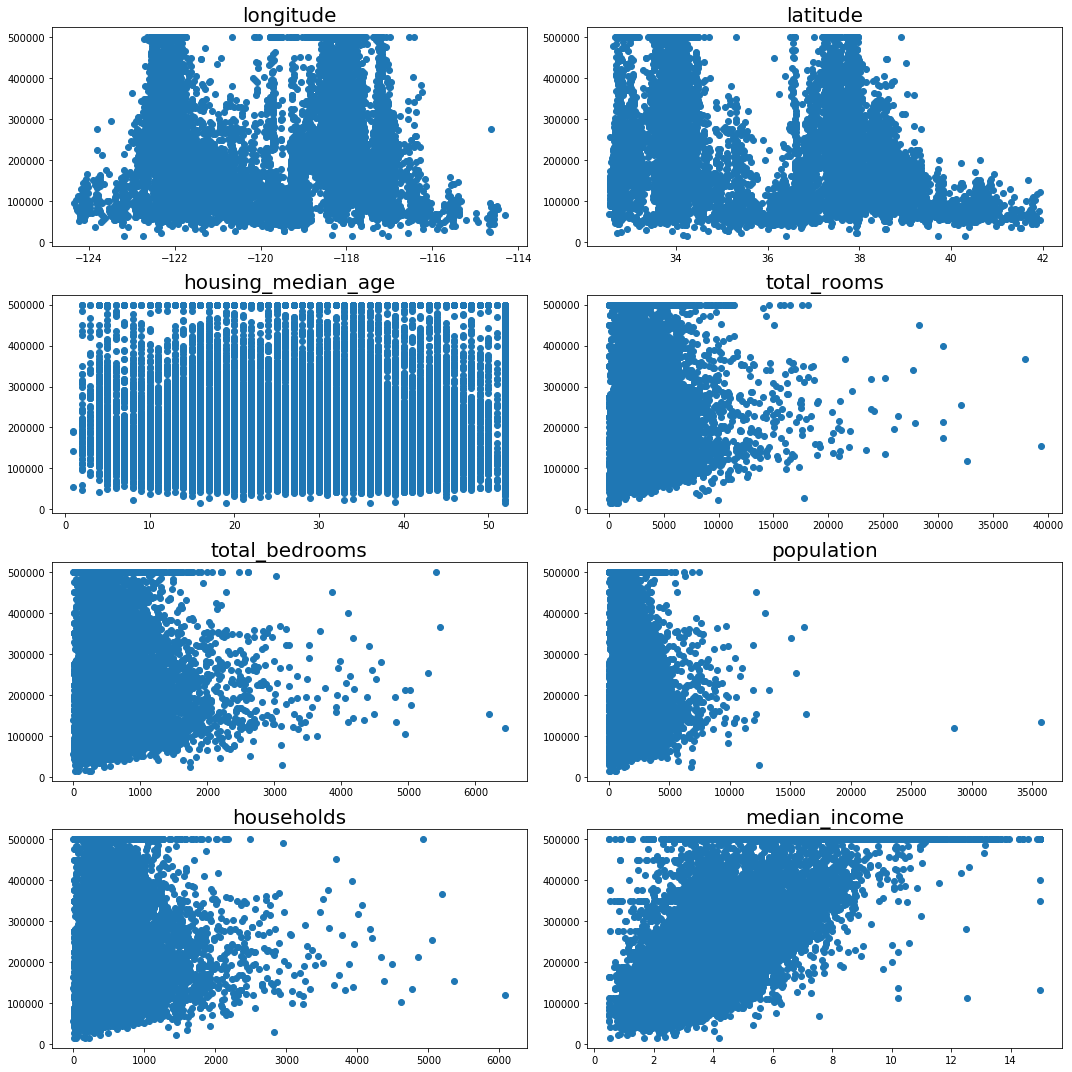

In [7]:
# scatter matrices to get a first impression of the type of association and the outcome var (median house value)
fig = plt.figure(figsize = (15,15))
for col in range(0,8):
    plt.subplot(4,2,col+1)
    plt.scatter(data.iloc[:,col],data["median_house_value"])
    plt.title(data.columns[col],fontsize=20)
    plt.tight_layout()

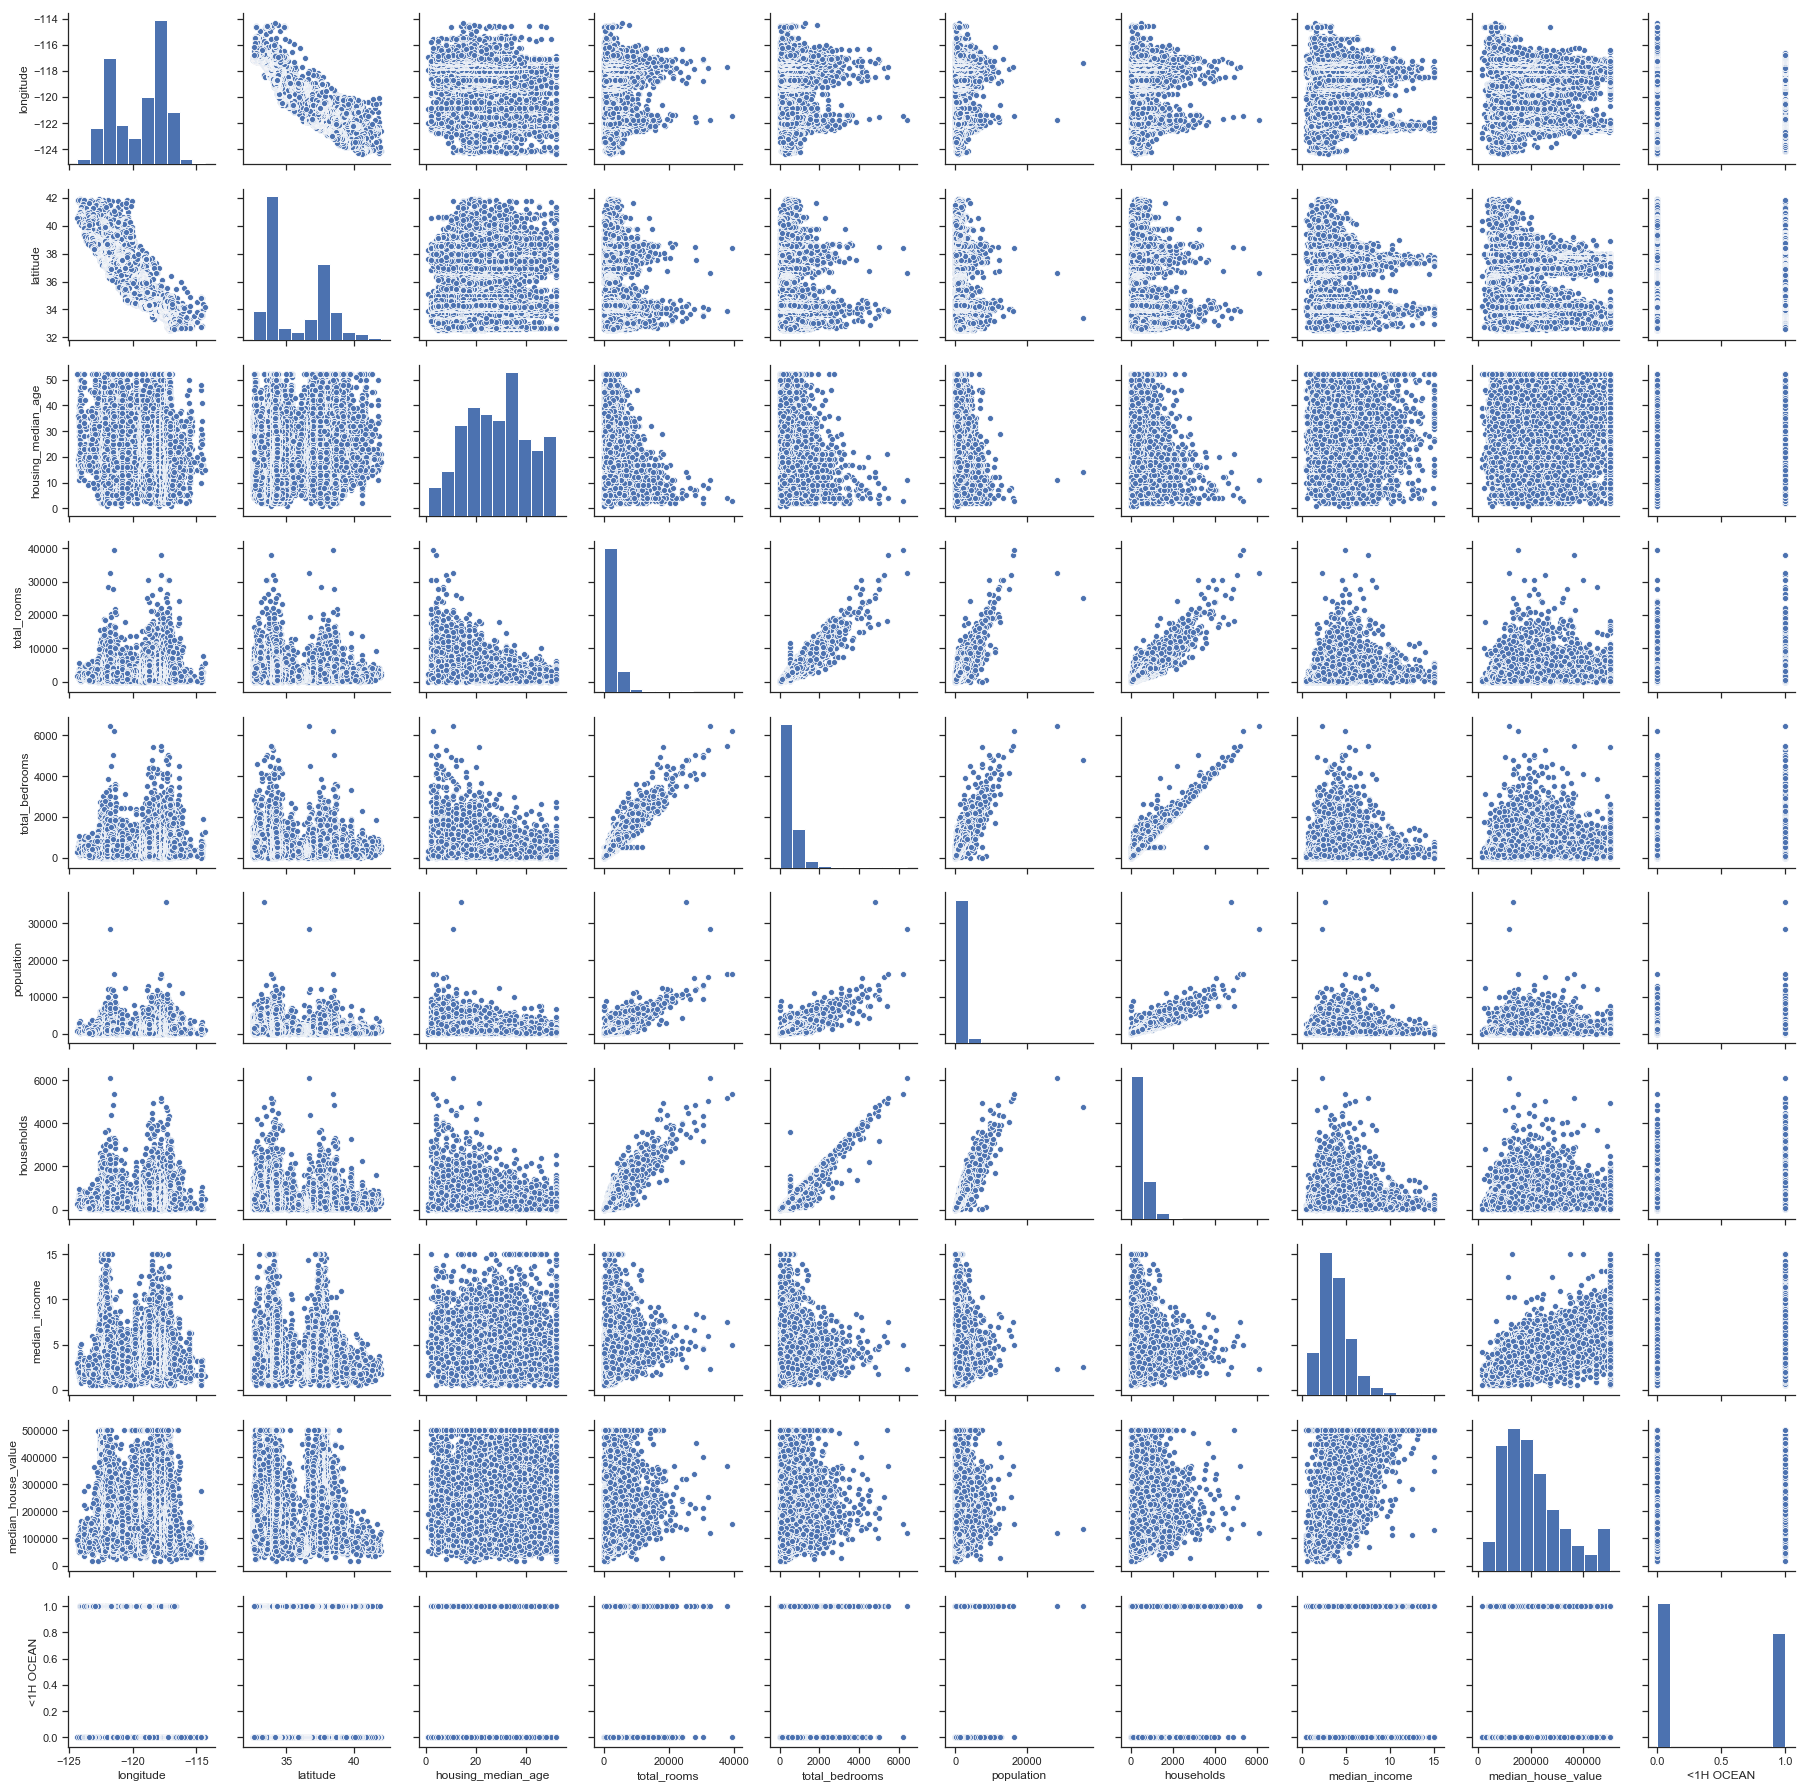

In [8]:
# alternative: complete scatter matrix using seaborn
sns.set(style="ticks")
plot_vars = data_new.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
sns.pairplot(plot_vars)

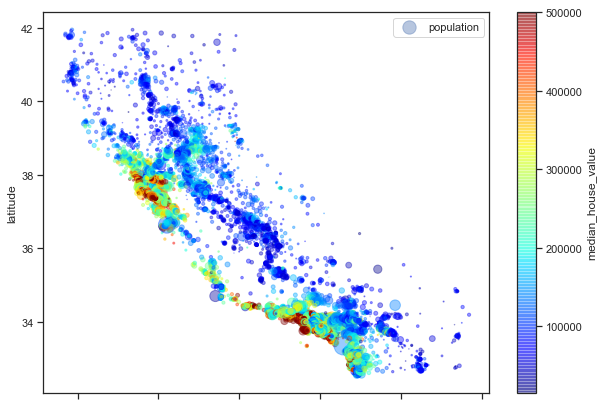

In [9]:
# looking at the association of longitude, latitude, population and house value
data_new.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                s=data_new["population"]/100,label="population",figsize=(10,7),
                c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

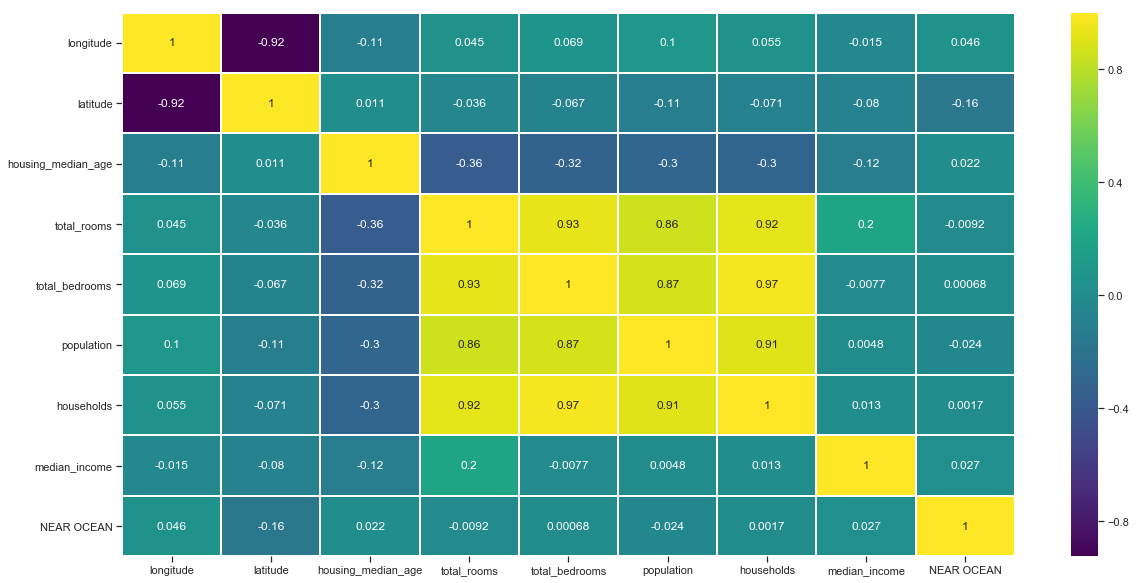

In [10]:
# correlation matrix to see size of linear relations between features
corr_matrix = data_new.iloc[:,[0,1,2,3,4,5,6,7,13]].corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');

## 3) Feature Engineering

Creating dataframes with different combinations of features / with modified features. These dataframes will later be analyzed with various ML methods

In [11]:
## creating dataframes with combined features (combining those features that are highly correlated)
# the dataframe rooms combined contains a feature "bedrooms per rooms" instead of total_rooms and total_bedrooms
rooms_combined = data_new.copy()
rooms_combined["bedr_per_rooms"] = rooms_combined["total_bedrooms"]/rooms_combined["total_rooms"]
rooms_combined = rooms_combined[['longitude','latitude','housing_median_age', 'bedr_per_rooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
rooms_combined.head()

,longitude,latitude,housing_median_age,bedr_per_rooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,0.146591,322,126,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,0.155797,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,0.129516,496,177,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,0.184458,558,219,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,0.172096,565,259,3.8462,0.0,0.0,0.0,1.0,0.0,342200


In [12]:
# the rooms pophouse dataframe additionally contains a feature "households per population" instead of households and population
rooms_pophouse_comb = rooms_combined.copy()
rooms_pophouse_comb["househ_per_pop"] = rooms_pophouse_comb["households"]/rooms_pophouse_comb["population"]
rooms_pophouse_comb = rooms_pophouse_comb[['longitude','latitude','housing_median_age', 'bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
rooms_pophouse_comb.head()

,longitude,latitude,housing_median_age,bedr_per_rooms,househ_per_pop,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,0.146591,0.391304,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,0.155797,0.473969,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,0.129516,0.356855,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,0.184458,0.392473,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,0.172096,0.458407,3.8462,0.0,0.0,0.0,1.0,0.0,342200


In [13]:
# dataframe with housing median age converted to categorical variables
agecats_data = data_new.copy()
agecats_data["age_cat"] = np.zeros(agecats_data.shape[0])

In [14]:
for row in range(0,agecats_data.shape[0]):
    if agecats_data.loc[row,"housing_median_age"] < 18:
        agecats_data.loc[row,"age_cat"] = 1
    elif agecats_data.loc[row,"housing_median_age"] < 29:
        agecats_data.loc[row,"age_cat"] = 2
    elif agecats_data.loc[row,"housing_median_age"] < 37:
        agecats_data.loc[row,"age_cat"] = 3
    elif agecats_data.loc[row,"housing_median_age"] < 52:
        agecats_data.loc[row,"age_cat"] = 4
    elif agecats_data.loc[row,"housing_median_age"] == 52:
        agecats_data.loc[row,"age_cat"] = 5

agecats_data.drop("housing_median_age",axis = 1,inplace = True)
agecats_data.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_cat
0,-122.23,37.88,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0,4.0
1,-122.22,37.86,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0,2.0
2,-122.24,37.85,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0,5.0
3,-122.25,37.85,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0,5.0
4,-122.25,37.85,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0,5.0


In [15]:
agecats_data = agecats_data[['longitude','latitude','age_cat','total_rooms', 'total_bedrooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [16]:
# dataframe with age as categorical var, and with the combined features
agecats_rooms_pophouse_comb = rooms_pophouse_comb.copy()
agecats_rooms_pophouse_comb["age_cat"] = agecats_data["age_cat"]

In [17]:
agecats_rooms_pophouse_comb = agecats_rooms_pophouse_comb[['longitude','latitude','age_cat', 'bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [18]:
# age is converted to a one-hot-encoded feature
binaryagecats_rooms_pophouse_comb = agecats_rooms_pophouse_comb.copy()
enc_age_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read
new_age_cats_arr = enc_age_ohe.fit_transform(binaryagecats_rooms_pophouse_comb["age_cat"].values.reshape(-1, 1))
new_age_cats_df = pd.DataFrame(data = new_age_cats_arr, columns = ["age1","age2","age3","age4","age5"])
binaryagecats_rooms_pophouse_comb = pd.concat([binaryagecats_rooms_pophouse_comb,new_age_cats_df],axis=1)
binaryagecats_rooms_pophouse_comb.drop("age_cat",axis=1,inplace=True)
binaryagecats_rooms_pophouse_comb.head()

,longitude,latitude,bedr_per_rooms,househ_per_pop,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,age1,age2,age3,age4,age5
0,-122.23,37.88,0.146591,0.391304,8.3252,0.0,0.0,0.0,1.0,0.0,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,0.155797,0.473969,8.3014,0.0,0.0,0.0,1.0,0.0,358500,0.0,1.0,0.0,0.0,0.0
2,-122.24,37.85,0.129516,0.356855,7.2574,0.0,0.0,0.0,1.0,0.0,352100,0.0,0.0,0.0,0.0,1.0
3,-122.25,37.85,0.184458,0.392473,5.6431,0.0,0.0,0.0,1.0,0.0,341300,0.0,0.0,0.0,0.0,1.0
4,-122.25,37.85,0.172096,0.458407,3.8462,0.0,0.0,0.0,1.0,0.0,342200,0.0,0.0,0.0,0.0,1.0


In [19]:
# creating a dataframe ("optimized_df") that contains distance to nearest city center instead of longitude and latitude. 
# KMeans used to allocate points to cities
coords_df = binaryagecats_rooms_pophouse_comb.loc[:,["longitude","latitude"]]
# coords minmax transformed (better for KMeans)
mima = preprocessing.MinMaxScaler()
coords_df = mima.fit_transform(coords_df)
coords_df = pd.DataFrame(data=coords_df,columns = ["longitude","latitude"])
# KMeans
km = KMeans(n_clusters = 2)
clusters=km.fit_predict(coords_df)
centroids = km.cluster_centers_ # n_clusters x n_features

In [20]:
centroids_coords = centroids[:,0:2]
centroids_coords

array([[0.63111816, 0.14903569],
       [0.26209546, 0.57649296]])

In [21]:
def k_mean_distance(data, cx, cy, nr_cluster, cluster_labels):
    """calculates the distances between points (specified by longitude and latitude) belonging to the cluster specified by
    nr_cluster in data and the point cx,cy, which is the centroid of the cluster the point belongs to
    @data: ndarray
    @cx, cy: coordinates of the cluster centroid
    @nr_cluster: label (nr) of the cluster (one of those in cluster_labels)
    @cluster_labels: ndarray with nrows = nrows of data, containing a nr reflecting which cluster the row belongs to, e.g. 0 and 1"""
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == nr_cluster]]
    return distances
test = coords_df.loc[:,["longitude","latitude"]]
k_mean_distance(np.array(test),0.26,0.57,0,clusters) # distances of the points belonging to cluster 1 from the cluster centroid

[0.8013684717412158,
 0.800694749529951,
 0.8021386710412975,
 0.8013259775042377,
 0.7941179837966363,
 0.7898171764159593,
 0.787379146652845,
 0.7991660830575672,
 0.7991660830575672,
 0.8006864371608565,
 0.8186102883042895,
 0.8069563485830061,
 0.8108880470225298,
 0.8108880470225298,
 0.8094414259306135,
 0.8109645356457881,
 0.8086806354331239,
 0.8093672447859451,
 0.8086806354331239,
 0.8086076113541205,
 0.8100546663032565,
 0.810814167542566,
 0.8086076113541205,
 0.8092267265956604,
 0.810814167542566,
 0.8115741803872896,
 0.8115741803872896,
 0.8370779241712828,
 0.8359199458595012,
 0.8282501996280981,
 0.8339694638540118,
 0.8332800865393182,
 0.8332800865393182,
 0.8325220148482928,
 0.8332120193714415,
 0.8339694638540118,
 0.816114080475568,
 0.816114080475568,
 0.8168137978696263,
 0.8175142977889388,
 0.8146152131121581,
 0.8124656288222023,
 0.8207436528757192,
 0.8144062724499647,
 0.8114093693748031,
 0.8077412720076163,
 0.8120537604472113,
 0.8179545035538806

In [22]:
distances = [] # list with 2 entries, distances[0] for distances from cluster 0, distances[1] from cluster 1
for i, (cx, cy) in enumerate(centroids_coords):
    mean_distance = k_mean_distance(np.array(coords_df), cx, cy, i, clusters)
    distances.append(mean_distance)

In [23]:
coords_df["label"] = clusters

In [24]:
coords_df.loc[coords_df["label"]== 0,"dist"] = distances[0]

In [25]:
coords_df.loc[coords_df["label"]== 1,"dist"] = distances[1]

In [26]:
coords_df.head()

,longitude,latitude,label,dist
0,0.211155,0.567481,1,0.051731
1,0.212151,0.565356,1,0.051171
2,0.210159,0.564293,1,0.053350
3,0.209163,0.564293,1,0.054320
4,0.209163,0.564293,1,0.054320


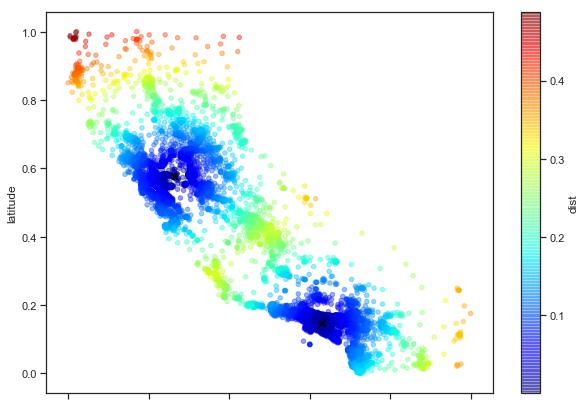

In [27]:
# sanity check: did the calculation of distances work?
coords_df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                figsize=(10,7),
                c="dist",cmap=plt.get_cmap("jet"),colorbar=True,)
centers = np.array(centroids)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')

In [28]:
optimized_df = binaryagecats_rooms_pophouse_comb.copy()

In [29]:
optimized_df.head()

,longitude,latitude,bedr_per_rooms,househ_per_pop,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,age1,age2,age3,age4,age5
0,-122.23,37.88,0.146591,0.391304,8.3252,0.0,0.0,0.0,1.0,0.0,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,0.155797,0.473969,8.3014,0.0,0.0,0.0,1.0,0.0,358500,0.0,1.0,0.0,0.0,0.0
2,-122.24,37.85,0.129516,0.356855,7.2574,0.0,0.0,0.0,1.0,0.0,352100,0.0,0.0,0.0,0.0,1.0
3,-122.25,37.85,0.184458,0.392473,5.6431,0.0,0.0,0.0,1.0,0.0,341300,0.0,0.0,0.0,0.0,1.0
4,-122.25,37.85,0.172096,0.458407,3.8462,0.0,0.0,0.0,1.0,0.0,342200,0.0,0.0,0.0,0.0,1.0


In [30]:
optimized_df["dist"] = coords_df["dist"]

In [31]:
optimized_df.drop(["longitude","latitude"],axis=1,inplace=True)

In [32]:
optimized_df = optimized_df[['dist','bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','age1','age2','age3','age4','age5','median_house_value']]
optimized_df.head()

,dist,bedr_per_rooms,househ_per_pop,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age1,age2,age3,age4,age5,median_house_value
0,0.051731,0.146591,0.391304,8.3252,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,452600
1,0.051171,0.155797,0.473969,8.3014,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,358500
2,0.053350,0.129516,0.356855,7.2574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,352100
3,0.054320,0.184458,0.392473,5.6431,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,341300
4,0.054320,0.172096,0.458407,3.8462,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,342200


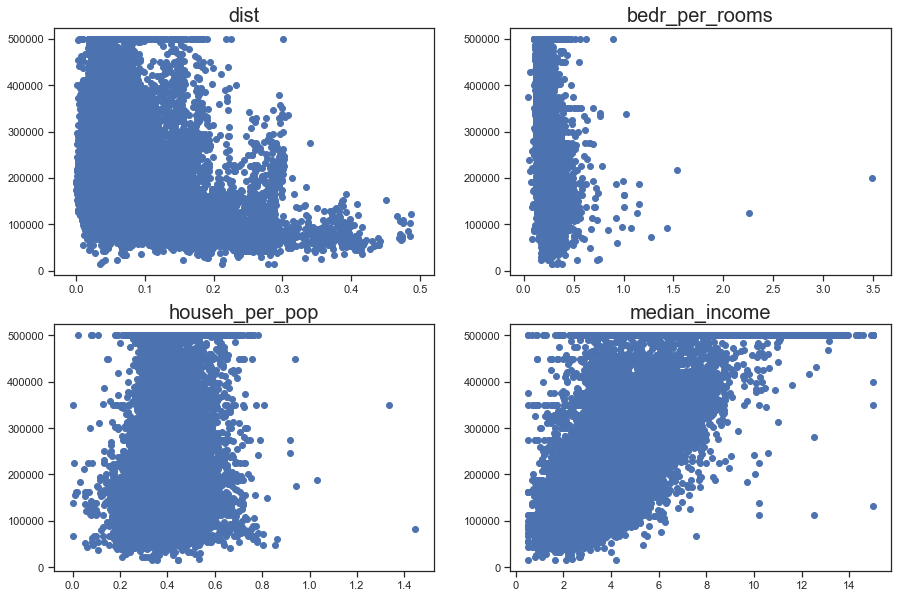

In [33]:
# looking at the associations of the newly created features to the outcome
fig = plt.figure(figsize = (15,10))
for col in range(0,4):
    plt.subplot(2,2,col+1)
    plt.scatter(optimized_df.iloc[:,col],optimized_df["median_house_value"])
    plt.title(optimized_df.columns[col],fontsize=20)

# 5) Testing various ML models on the data

In [34]:
class ItsMagic: 
    def __init__(self):
        self.results = pd.DataFrame() # contains the predicted ys
        self.input_data = {} # dict of dicts, contains the input data frames
        self.algo_names = [] # list of all algo names that were added
        self.algos = {} # dict of dicts, contains the algo names and algos
        self.analysis_summaries = {} # contains all analyses that have already been run and details about them 
                                        # (i.e. which algo and input data was used)

    def add_input_prep(self, input_data_name, input_data, colidx_with_cont_data = list(range(0,8))):
        """accepts an input data frame, splits it in training and test, scales the continuous features,
        and stores the input df in input_data. colidx.. should be a list of column indices of continous features
        input_data should be a manipulated version of data_new (i.e. ocean proximity 
        already converted, NaNs in total bedrooms already dropped,index reset.)"""
        if input_data_name not in self.input_data:
            self.input_data[input_data_name] = {'raw_data': input_data}

            #split in train and test
            splitdata = {}
            self.input_data[input_data_name]["prep_data"] = splitdata
            splitdata["train_X"], splitdata["test_X"], splitdata["train_y"],splitdata["test_y"] = train_test_split(self.input_data[input_data_name]["raw_data"].loc[:, self.input_data[input_data_name]["raw_data"].columns != 'median_house_value'],\
                                                               self.input_data[input_data_name]["raw_data"]["median_house_value"], test_size=0.2, random_state=42)
            nr_features = splitdata["train_X"].shape[1]

            if colidx_with_cont_data:
                #standard scaling of continuous variables
                scaler = preprocessing.StandardScaler()
                train_df_cont = self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data]
                scaler.fit(train_df_cont) 
                self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data] = scaler.transform(train_df_cont)
                self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data] = scaler.transform(self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data])
            
            print(f"Input data: {input_data_name}.")
            print(f"Scaled {len(colidx_with_cont_data)} features.")
            print(f"The scaled features are: {splitdata['train_X'].iloc[:,colidx_with_cont_data].columns.values}")
            colindices = list(range(0,splitdata['train_X'].shape[1]))
            condition = [c not in colidx_with_cont_data for c in colindices]
            not_scaled = self.input_data[input_data_name]['prep_data']['train_X'].iloc[:,condition].columns.values 
            print(f"Did NOT scale these ones: {not_scaled}")
  
            return self.input_data
        else:
            print("Input data name already exists!")
    
    def run_analysis(self,analysis_name,input_data_name,algo_name,):
        """runs an analysis with a given input_data and algo_name. Calculates error rates and stores
        them in self.analysis_summaries. For LinReg, also calculates beta coefficients."""
        
        if analysis_name not in self.analysis_summaries:
            self.analysis_summaries[analysis_name] = {"input_data_name":input_data_name,"algo_name":algo_name,"fit":-1}
            
            # get the data from input_data
            train_X, test_X, train_y, test_y = self.input_data[input_data_name]['prep_data']["train_X"],\
                self.input_data[input_data_name]['prep_data']["test_X"],\
                self.input_data[input_data_name]['prep_data']["train_y"],\
                self.input_data[input_data_name]['prep_data']["test_y"]
            
            if self.analysis_summaries[analysis_name]['fit'] == -1:
                print("self analysis summary is -1")
                self.analysis_summaries[analysis_name]['fit'] = self.algos[algo_name]['algo'].fit(train_X, train_y) 
                pred = self.algos[algo_name]['algo'].predict(test_X)
                self.results[analysis_name] = pred 
                
                # error and r2 calculation
                mse= mean_squared_error(pred,test_y)
                rmse = np.sqrt(mse)
                self.analysis_summaries[analysis_name]["RMSE"] = rmse
                R2 = self.analysis_summaries[analysis_name]['fit'].score(test_X, test_y)
                self.analysis_summaries[analysis_name]["R2"] = R2
                rss = (sum((pred - test_y)**2))
                rse = np.sqrt(rss/(test_X.shape[0]-test_X.shape[1]))
                self.analysis_summaries[analysis_name]["RSE"] = rse
                print(f"RSE: {rse}")
                print(f"RMSE: {rmse}")
                print(f"R2: {R2}")
                if isinstance(self.algos[algo_name]["algo"],linear_model.base.LinearRegression):
                    betas = self.analysis_summaries[analysis_name]['fit'].coef_
                    betas_df = pd.DataFrame(data = betas.reshape(1,train_X.shape[1]),columns = train_X.columns)
                    self.analysis_summaries[analysis_name]["betas"] = betas_df
        else: print("Analysis name already exists!")
    
    def run_all_combis(self):
        for i in self.input_data.keys():
            for a in self.algos:
                print(a)
                ananame = str(a) + "_" + str(i)
                print(f"\nRunning {ananame} analysis...")
                self.run_analysis(ananame,i,a)
                print("Finished!")
                      
    def calculate_error_rates(self):
        """returns a df with R2, RMSE and RSE for each analysis (i.e. each combination of 
        input_data and algo that was run with run_analysis)"""
        rates = pd.DataFrame(columns = ["Input DF","Algo Name","R2","RMSE","RSE"],index = self.analysis_summaries.keys())
        for ana in self.analysis_summaries:
            rates.loc[ana,"Input DF"] = self.analysis_summaries[ana]["input_data_name"]
            rates.loc[ana,"Algo Name"] = self.analysis_summaries[ana]["algo_name"]
            rates.loc[ana,"R2"] = self.analysis_summaries[ana]["R2"]
            rates.loc[ana,"RMSE"] = self.analysis_summaries[ana]["RMSE"]
            rates.loc[ana,"RSE"] = self.analysis_summaries[ana]["RSE"]
        #display(rates)
        return rates

         
    def add_algo(self, algo, algo_name):
        """adds a new algo including its configurations (e.g. n_neighbors). The algo needs to be
        given a unique name"""
        if algo_name not in self.algo_names:
            self.algo_names.append(algo_name)
            self.algos[algo_name] = {'algo_name': algo_name, 'algo': algo}
        else: print("This algo config already exists!!")
            
    def delete_input_data(self,input_data_name):
        self.input_data.pop(input_data_name,None) # None means nothing happens if key not found
        print(f"{input_data_name} was deleted")
        
    def get_results(self):
        return self.results
        

In [51]:
analysis = ItsMagic()
analysis.add_input_prep("orig_data",data_new,list(range(0,8)))
analysis.add_input_prep("no_coords",data_new.iloc[:,list(range(2,14))],list(range(0,6)))
analysis.add_input_prep("orig_data",data_new,list(range(0,8))) # is not added again (already exists)
analysis.add_input_prep("rooms_combined",rooms_combined,list(range(0,7)))
analysis.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])
analysis.add_input_prep("agecats_data",agecats_data,list(range(0,8)))
analysis.add_input_prep("optimized",optimized_df,list(range(0,4)))
analysis.add_input_prep("agecats_rooms_pophouse_comb",agecats_rooms_pophouse_comb,list(range(0,6)))
analysis.add_input_prep("binaryagecats_rooms_pophouse_comb",binaryagecats_rooms_pophouse_comb,[0,1,2,3,4])
analysis.input_data

Input data: orig_data.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: no_coords.
Scaled 6 features.
The scaled features are: ['housing_median_age' 'total_rooms' 'total_bedrooms' 'population'
 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data name already exists!
Input data: rooms_combined.
Scaled 7 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'bedr_per_rooms' 'population'
 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: rooms_pophouse_comb.
Scaled 6 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'bedr_per_rooms'
 'househ_per_pop' 'median_income']
Did NOT scale these

{'orig_data': {'raw_data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  0        -122.23     37.88                  41          880           129.0   
  1        -122.22     37.86                  21         7099          1106.0   
  2        -122.24     37.85                  52         1467           190.0   
  3        -122.25     37.85                  52         1274           235.0   
  4        -122.25     37.85                  52         1627           280.0   
  5        -122.25     37.85                  52          919           213.0   
  6        -122.25     37.84                  52         2535           489.0   
  7        -122.25     37.84                  52         3104           687.0   
  8        -122.26     37.84                  42         2555           665.0   
  9        -122.25     37.84                  52         3549           707.0   
  10       -122.26     37.85                  52         2202           434.0   
  1

In [52]:
analysis.add_algo(KNeighborsRegressor(n_neighbors=1), 'knr_1') 
analysis.add_algo(KNeighborsRegressor(n_neighbors=2), 'knr_2')
analysis.add_algo(KNeighborsRegressor(n_neighbors=3), 'knr_3')
analysis.add_algo(KNeighborsRegressor(n_neighbors=4), 'knr_4')
analysis.add_algo(KNeighborsRegressor(n_neighbors=5), 'knr_5')
analysis.add_algo(KNeighborsRegressor(n_neighbors=6), 'knr_6')
analysis.add_algo(KNeighborsRegressor(n_neighbors=7), 'knr_7')
analysis.add_algo(KNeighborsRegressor(n_neighbors=10), 'knr_10')
analysis.add_algo(KNeighborsRegressor(n_neighbors=125), 'knr_125')
analysis.add_algo(linear_model.LinearRegression(),'standard_linreg')
analysis.add_algo(DecisionTreeRegressor(),'dtree')
analysis.add_algo(RandomForestRegressor(),'randdtree')
analysis.algos

{'knr_1': {'algo_name': 'knr_1',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform')},
 'knr_2': {'algo_name': 'knr_2',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=2, p=2,
            weights='uniform')},
 'knr_3': {'algo_name': 'knr_3',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')},
 'knr_4': {'algo_name': 'knr_4',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform')},
 'knr_5': {'algo_name': 'knr_5',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_n

In [53]:
analysis.delete_input_data('rooms_pophouse_comb') # testing the delete function

rooms_pophouse_comb was deleted


In [54]:
analysis.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])

Input data: rooms_pophouse_comb.
Scaled 6 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'bedr_per_rooms'
 'househ_per_pop' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


{'orig_data': {'raw_data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  0        -122.23     37.88                  41          880           129.0   
  1        -122.22     37.86                  21         7099          1106.0   
  2        -122.24     37.85                  52         1467           190.0   
  3        -122.25     37.85                  52         1274           235.0   
  4        -122.25     37.85                  52         1627           280.0   
  5        -122.25     37.85                  52          919           213.0   
  6        -122.25     37.84                  52         2535           489.0   
  7        -122.25     37.84                  52         3104           687.0   
  8        -122.26     37.84                  42         2555           665.0   
  9        -122.25     37.84                  52         3549           707.0   
  10       -122.26     37.85                  52         2202           434.0   
  1

In [55]:
analysis.run_all_combis()

knr_1

Running knr_1_orig_data analysis...
self analysis summary is -1
RSE: 75582.0912762676
RMSE: 75462.98493078256
R2: 0.565428641804022
Finished!
knr_2

Running knr_2_orig_data analysis...
self analysis summary is -1
RSE: 66413.9103189138
RMSE: 66309.25168862342
R2: 0.6644622455649187
Finished!
knr_3

Running knr_3_orig_data analysis...
self analysis summary is -1
RSE: 63780.807624402245
RMSE: 63680.29837968592
R2: 0.6905408563996923
Finished!
knr_4

Running knr_4_orig_data analysis...
self analysis summary is -1
RSE: 62372.75381232411
RMSE: 62274.463454926234
R2: 0.7040535540434912
Finished!
knr_5

Running knr_5_orig_data analysis...
self analysis summary is -1
RSE: 61609.19799165195
RMSE: 61512.110886795126
R2: 0.7112550471968917
Finished!
knr_6

Running knr_6_orig_data analysis...
self analysis summary is -1
RSE: 61522.36267168717
RMSE: 61425.412406621384
R2: 0.7120684189459293
Finished!
knr_7

Running knr_7_orig_data analysis...
self analysis summary is -1
RSE: 61405.82235245105

RSE: 58389.69173460358
RMSE: 58290.59411386922
R2: 0.7407074113068837
Finished!
knr_7

Running knr_7_optimized analysis...
self analysis summary is -1
RSE: 57900.92413003192
RMSE: 57802.6560342579
R2: 0.745030208118697
Finished!
knr_10

Running knr_10_optimized analysis...
self analysis summary is -1
RSE: 57719.27533080452
RMSE: 57621.315525129045
R2: 0.7466274988970578
Finished!
knr_125

Running knr_125_optimized analysis...
self analysis summary is -1
RSE: 62180.282295199875
RMSE: 62074.75137272064
R2: 0.7059486906784064
Finished!
standard_linreg

Running standard_linreg_optimized analysis...
self analysis summary is -1
RSE: 68363.45193555877
RMSE: 68247.42708201476
R2: 0.6445604860272356
Finished!
dtree

Running dtree_optimized analysis...
self analysis summary is -1
RSE: 75886.14366845551
RMSE: 75757.3514782447
R2: 0.5620316711579154
Finished!
randdtree

Running randdtree_optimized analysis...
self analysis summary is -1
RSE: 56144.56226245752
RMSE: 56049.27502301376
R2: 0.76026406

In [56]:
res_allcombis = analysis.calculate_error_rates()

In [58]:
# random forest performs best on the original data, without any feature engineering
with pd.option_context('display.max_rows', 10, 'display.max_columns', 30):
    display(res_allcombis.sort_values(["R2","RMSE"],ascending=[False,True]))

,Input DF,Algo Name,R2,RMSE,RSE
randdtree_orig_data,orig_data,randdtree,0.804447,50621.6,50701.5
randdtree_agecats_data,agecats_data,randdtree,0.797393,51526.5,51607.8
randdtree_agecats_rooms_pophouse_comb,agecats_rooms_pophouse_comb,randdtree,0.790594,52384,52453.9
randdtree_rooms_combined,rooms_combined,randdtree,0.789067,52574.5,52651.1
randdtree_binaryagecats_rooms_pophouse_comb,binaryagecats_rooms_pophouse_comb,randdtree,0.785968,52959.4,53055.8
...,...,...,...,...,...
knr_1_orig_data,orig_data,knr_1,0.565429,75463,75582.1
dtree_optimized,optimized,dtree,0.562032,75757.4,75886.1
knr_1_rooms_combined,rooms_combined,knr_1,0.539685,77666,77779.2
knr_1_no_coords,no_coords,knr_1,0.464935,83735,83846.8


### Testing model calibration (example)

In [59]:
analysis.results["standard_linreg_rooms_pophouse_comb"].mean()

206086.77519379844

In [60]:
analysis.input_data["rooms_pophouse_comb"]["prep_data"]["test_y"].mean()

205500.30959302327

## 6) Pickling of the created analysis object

In [61]:
# open the file for writing
fileObject = open("analysis_pickled",'wb') 
# this writes the object analysis to the
# file named 'analysis_pickled'
pickle.dump(analysis,fileObject)
# here we close the fileObject
fileObject.close()

In [62]:
# open the file for reading
fileObject = open("analysis_pickled",'rb')  
# load the object from the file into var loaded_analysis
loaded_analysis = pickle.load(fileObject)
# here we close the fileObject
fileObject.close()

In [63]:
loaded_analysis.algos

{'knr_1': {'algo_name': 'knr_1',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform')},
 'knr_2': {'algo_name': 'knr_2',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=2, p=2,
            weights='uniform')},
 'knr_3': {'algo_name': 'knr_3',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')},
 'knr_4': {'algo_name': 'knr_4',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform')},
 'knr_5': {'algo_name': 'knr_5',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_n

# ToDo

In [64]:
# incorporate feature selector for LinReg

#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html